In [1]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
#from nltk.corpus import stopwords
import stopword
import gensim
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
try:
    plt.style.use('ggplot')
except:
    # version of matplotlib might not be recent
    pass


def remove_stopwords(text):
    stop = stopword.allStopWords
    
    text=text.lower()
    text=text.split()
    newlist=[]
    stop_list=[]
    for i in stop:
        stop_list.append(i)
        
    for i in range (0,len(stop_list)):
        stop_list[i]=stop_list[i].lower()
    
    for i in text:
        if i not in stop_list: 
            newlist.append(i)
    s=" "
    newlist=s.join(newlist)
    
    newlist=newlist.replace('------------------','\n------------------\n')
    return newlist    

tokenizer = RegexpTokenizer(r'\w+')
stop = stopword.allStopWords
p_stemmer = PorterStemmer()



In [3]:
f1=open('business1.txt')
business=f1.read()
#business=remove_stopwords(business)
f2=open('entertainment1.txt')
entertainment=f2.read()
#entertainment=remove_stopwords(entertainment)
f3=open('politics1.txt')
politics=f3.read()
#politics=remove_stopwords(politics)
f4=open('sport1.txt')
sport=f4.read()
#sport=remove_stopwords(sport)
f5=open('tech1.txt')
tech=f5.read()
#tech=remove_stopwords(tech)

In [4]:
sen = [business,entertainment,politics,sport,tech]
vec = CountVectorizer()
vec.fit_transform(sen)
sm = vec.transform(sen) 
print ("Sm = ",type(sm))   
doc_set = [business,entertainment,politics,sport,tech]
#doc_set=[business]
#doc_set=[mix]
texts = []
for i in doc_set:
    tokens = tokenizer.tokenize(i)
    stemmed_tokens = [p_stemmer.stem(i) for i in tokens]
    texts.append(stemmed_tokens)


Sm =  <class 'scipy.sparse.csr.csr_matrix'>


#######
Topics Discovered In Training data :

(0, '0.009*"use" + 0.008*"peopl" + 0.008*"game" + 0.007*"can" + 0.005*"technolog" + 0.005*"mobil" + 0.005*"phone" + 0.005*"mr" + 0.004*"servic" + 0.004*"user"')
(1, '0.007*"game" + 0.006*"play" + 0.006*"win" + 0.005*"t" + 0.005*"time" + 0.005*"first" + 0.005*"player" + 0.005*"england" + 0.005*"against" + 0.004*"back"')
(2, '0.006*"compani" + 0.006*"mr" + 0.006*"firm" + 0.006*"market" + 0.005*"bank" + 0.004*"sale" + 0.004*"share" + 0.004*"price" + 0.004*"growth" + 0.004*"economi"')
(3, '0.011*"mr" + 0.006*"film" + 0.005*"peopl" + 0.004*"govern" + 0.004*"say" + 0.004*"labour" + 0.004*"parti" + 0.004*"elect" + 0.004*"best" + 0.003*"blair"')
(4, '0.002*"mr" + 0.001*"time" + 0.001*"peopl" + 0.001*"t" + 0.001*"show" + 0.001*"film" + 0.001*"last" + 0.001*"use" + 0.001*"say" + 0.001*"game"')
#######


Detected Topics : 


Topic :  (1, '0.007*"game" + 0.006*"play" + 0.006*"win" + 0.005*"t" + 0.005*"time" + 0.005*"first" + 0.005*"player" + 0.005*"eng

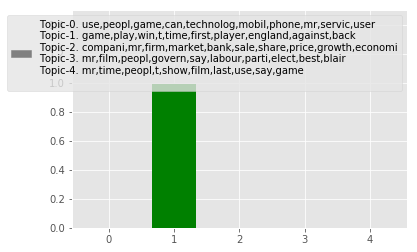

In [5]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

#### Enter No. Of Topics in numt variable
numt=5
########################################

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=numt, id2word = dictionary, passes=10)
print ('#######')
print ('Topics Discovered In Training data :\n')
topi=ldamodel.print_topics(num_topics=numt,num_words=10)
for i in topi:
    print (i)
print ('#######')

test_string='''claxton hunting first major medal british hurdler sarah claxton confident can win first major medal next month european indoor championships madrid old already smashed british record hurdles twice season setting mark seconds win aaas title quite confident claxton take race comes long keep training much think chance medal claxton won national hurdles title past three years struggled translate domestic success international stage now scotland born athlete owns equal fifth fastest time world last week birmingham grand prix claxton left european medal favourite russian irina shevchenko trailing sixth spot first time claxton preparing campaign hurdles explain leap form previous seasons old contested long jump since moving colchester london re focused attentions claxton see training regime pays dividends european indoors take place march'''
test_string=test_string.lower()
topic_detect=ldamodel[dictionary.doc2bow(test_string.split())]
#print topic_detect
#print '##'
print ('\n\nDetected Topics : \n\n') 
for i in topic_detect:
    index=i[0]
    prob=i[1]
    print ('Topic : ',topi[index])
    print ('Probability : ',prob)
    print ('\n\n')
    
probab=[]
for i in range (0,numt):
    probab.append(0)
    
for i in topic_detect:
    probab[i[0]]=i[1]
y =probab
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="green",align='center')
axes = plt.gca()
axes.set_ylim([0,1.5])
top=[]

legend=''
legend_topic=topi
legend_topic=list(legend_topic)
for i in range (0,len(legend_topic)):
    legend_topic[i]=list(legend_topic[i])

for i in legend_topic:
    for j in i[1]:
        if j.isalpha() == False and j!='+':
            i[1]=i[1].replace(j,'')
        if j=='+':
            i[1]=i[1].replace(j,',')
for i in range(0,numt):
    legend=legend+'Topic-'+str(i)+'. '+legend_topic[i][1]+'\n' 

red_patch= mpatches.Patch(color='gray', label=legend)
plt.legend(handles=[red_patch])
plt.show()
